In [36]:
import keras
import os
#import cv2 as cv2
from sklearn import preprocessing
import sklearn.preprocessing
import numpy as np
#from os import walk
#from array import *

import matplotlib.pyplot as plt
#from build_database import build_database

from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

from PIL import Image, ImageOps

import pickle

In [37]:
descriptors_val = pickle.load(open("mypredictions_queries_nrescaled_aumentation_dataproaumentation.p", "rb"))

In [38]:
descriptors_val2 = pickle.load(open("fc2_queries_nrescaled_aumentation_dataproaumentation.p", "rb"))

In [39]:
descriptors_train = pickle.load(open("mypredictions_database_nrescaled_aumentation_dataproaumentation.p", "rb"))

In [40]:
descriptors_train2 = pickle.load(open("fc2_database_nrescaled_aumentation_dataproaumentation.p", "rb"))

In [41]:
imagen = pickle.load(open("photo_queries_tuning.p", "rb"))

In [42]:
imagen3 = pickle.load(open("photo_database_tuning.p", "rb"))

In [43]:
x_val1 = np.reshape(descriptors_val, (1673,13)) 

In [44]:
x_val2 = np.reshape(descriptors_val2, (1673,4096)) 

In [45]:
x_train1 = np.reshape(descriptors_train, (1671,13)) 

In [46]:
x_train2 = np.reshape(descriptors_train2, (1671,4096)) 

In [47]:
x_val1l = x_val1.tolist()
np.shape(x_val1l)

(1673, 13)

In [48]:
x_val2l = x_val2.tolist()
np.shape(x_val2l)

(1673, 4096)

In [49]:
x_train1l = x_train1.tolist()
np.shape(x_train1l)

(1671, 13)

In [50]:
x_train2l = x_train2.tolist()
np.shape(x_train2l)

(1671, 4096)

In [51]:
x_val2l = sklearn.preprocessing.normalize(x_val2l, norm='l2', axis=1, copy=True, return_norm=False)

In [52]:
x_train2l = sklearn.preprocessing.normalize(x_train2l, norm='l2', axis=1, copy=True, return_norm=False)

In [53]:
x_val = np.concatenate((x_val1l, x_val2l),axis=1)

In [54]:
x_train = np.concatenate((x_train1l, x_train2l),axis=1)

In [55]:
x_val = np.asarray(x_val)

In [58]:
#val = quieries
#train = database


final=[]
for query in x_val:
    i=0
    same_class=[]
    nsame_class=[]
    pos_nsame_class=[]
    pos_same_class=[]
    for imag in x_train:
        
        if np.argmax( imag[0:13]) == np.argmax(query[0:13]):
            same_class.append(np.matmul(imag[13::],query[13::].transpose()))
            pos_same_class.append(i)
        else :
            nsame_class.append(np.matmul(imag[13::],query[13::].transpose()))
            pos_nsame_class.append(i)
        i = i+1

    same_class = np.argsort(same_class, axis= 0)[::-1]
    #same_class = pos_same_class[same_class[:]]
    same_class = [pos_same_class[pos] for pos in same_class]
    nsame_class = np.argsort(nsame_class, axis= 0)[::-1]
    nsame_class = [pos_nsame_class[pos] for pos in nsame_class]

    final.append(np.concatenate((same_class,nsame_class)))
#
#same_class

In [59]:
ranks = np.asarray(final)

In [60]:
#similarities=np.matmul(x_val,descriptors_traint)

In [61]:
#ranks = np.argsort(similarities, axis=1)[:,::-1]

In [62]:
# get the original images for visualization
x_val_images = []
x_train_images = []

In [63]:
v = 0
for v in range(1673): 
    x_val_images.append(np.array(imagen[v]))

In [64]:
b = 0
for b in range(1671): 
    x_train_images.append(np.array(imagen3[b]))

In [65]:
from PIL import Image, ImageOps;
# get the original images for visualization
# x_test_normalized = np.empty((717,4096))
h,w = (150, 150)
new_image= Image.new('RGB', (h*20,w*25))

In [66]:
# Visualize ranks of the 10 queries

offset = 0 # it will show results from query #'offset' to #offset+10
for q in range(25):
    ranks_q = ranks[q*(offset+1),:]
    for i in range(19):
        new_image.paste(Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q))

  # visualize query
    ima_q = Image.fromarray(x_val_images[q*(offset+1)])
    ima_q = ImageOps.expand(ima_q, border=20, fill='blue')

    new_image.paste(ima_q, (0,w*q))

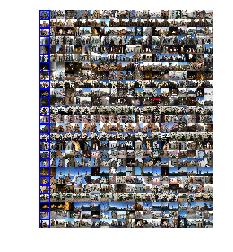

In [67]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [68]:
new_image.save('Last_normalfc+mypredict2.png')

In [70]:
s = (1673,1671)
final = np.zeros(s)

for q in range(1673):
    ranks_q = []
    ranks_q = ranks[q,:] 
    final[q] = ranks_q


In [71]:
final_qr = range(1673)
final_qr = np.asarray(final_qr)


In [72]:
final_qr = np.transpose([final_qr])

In [73]:
ff = (1673,1672)
ff = np.zeros(s)
ff = np.concatenate((final_qr,final),axis=1)

In [74]:
maximo = ff[0][2]
for i in range(len(ff)):
    
    if ff[i][2] > maximo:
        maximo = ff[i][1671]

print(maximo)

1628.0


In [75]:
count = 0
count2 = 0
lista_nom_database = []
lista_nom_queries = []
for root, dirs, files in os.walk("database/", topdown=False):
    for name in files:
        lista_nom_database.append(os.path.join(root, name))
        count = count + 1


In [76]:
lista_nom_database.pop(0)
lista_nom_database.pop(0)
lista_nom_database.pop(0)

'database/.ipynb_checkpoints/aaoxxdjngi-checkpoint.jpg'

In [78]:
lista_nom_database.pop(0)

'database/.ipynb_checkpoints/qneaqmthli-checkpoint.jpg'

In [79]:
#Creacion de una lista con los paths de las fotos - queries
for root, dirs, files2 in os.walk("queries/", topdown=False):
    for name2 in files2:
        lista_nom_queries.append(os.path.join(root, name2))
        count2 = count2 + 1

In [81]:
lista_nom_queries.pop(0)
lista_nom_queries.pop(0)
lista_nom_queries.pop(0)
lista_nom_queries.pop(0)

'queries/.ipynb_checkpoints/huvkiuohvm-checkpoint.jpg'

In [82]:
lista_nom_queries.sort()

In [83]:
len(lista_nom_queries)

1673

In [84]:
lista_nom_database.sort()

In [85]:
len(lista_nom_database)

1671

In [86]:
real_database_academy =  {}
real_query_academy =  {}
k=0
for k in range(len(lista_nom_database)):
    
    if not real_database_academy.get(k):
        real_database_academy[k] = lista_nom_database[k][9:len(lista_nom_database[k])-4]

k=0

for k in range(len(lista_nom_queries)):
    if not real_query_academy.get(k):
        real_query_academy[k] = lista_nom_queries[k][8:len(lista_nom_queries[k])-4]



In [87]:
h ,w= 1673,2;
Matrix = [[0 for x in range(w)] for y in range(h)]

for o in range (1673):
    Matrix[o][0] = real_query_academy[ff[o][0]]
    
    
for q in range(1673):
    ranks_q = ranks[q,:]
    
    for i in range(1671):
        if i == 0:
            name = real_database_academy[ranks_q[i]]
        if i == 1671:
            name = name +'\n'
        else:
            name = name + ' ' + real_database_academy[ranks_q[i]]

    Matrix[q][1] = name
#for l in range(1673):

#    for op in range(1671):
        
#        Matrix[l][op+1] = real_database_academy[ff[l][op+1]]
#
#

In [88]:
import csv
row1 = ["Query","RetrievedDocuments"]
with open("Fc+mypredict_well_aumentation.csv", 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(row1)
    for z in range(1673):
            wr.writerow(Matrix[z])